## Increasing resource utilization

Workload can start with 1 core/1 task but sharing core for short running tasks would increase resource utilization.

## Configuration
- (Variant) Number of nodes: from 6 to 4 (240 cores to 160 cores, 33% reduced)
- 295 number of tasks
- types of tasks 7200s:3900s:840s:600s:5s (MDRUN:CVAE:TICA:Inference:RLDock)
- Fixed ratio is 12:10:10:10:1
- 2 hours of TTX


In [6]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt 

In [17]:
data = {"126": ["1:10", 126,47.293,158017.989,397007.915],
       "168": ["{:.02f}".format(295/160),168,56.325,84276.823,396550.600],
       "210": ["{:.02f}".format(295/200),210,46.027,206054.547,396593.495],
       "252": ["{:.02f}".format(295/240),252,47.293,326067.400,396637.251]}
pd_data = pd.DataFrame.from_dict(data, orient='index', columns=['ratio (cpu/task)','cores','utilization','draining','Execution Cmd'])
pd_data['idled_sec'] = pd_data['draining'] / pd_data['cores']
pd_data['util_rate'] = (pd_data['Execution Cmd'] / (pd_data['Execution Cmd'] + pd_data['draining'])) * 100

Text(0, 0.5, 'Resource Utilization (%)')

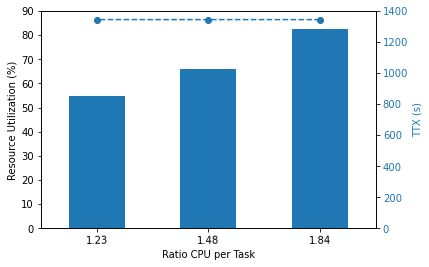

In [39]:
fig, ax = plt.subplots()

ax1 = ax.twinx()
ax1_color = 'tab:blue'
ttx = pd_data_except_126['Execution Cmd'] / 295
ttx.plot(ax=ax1, style='--', color=ax1_color, marker='o')
ax.set_ylim(0,90)
ax1.set_ylim(0, 1400)
ax1.set_ylabel('TTX (s)', color=ax1_color)
ax1.tick_params(axis='y', labelcolor=ax1_color)

pd_data_except_126 = pd_data[pd_data['cores']!=126]
pd_data_except_126.plot.bar('ratio (cpu/task)','util_rate', ax=ax, legend=False, rot=1)
ax.invert_xaxis()

ax.set_xlabel("Ratio CPU per Task")
ax.set_ylabel("Resource Utilization (%)")

In [29]:
pd_data_except_126

,ratio (cpu/task),cores,utilization,draining,Execution Cmd,idled_sec,util_rate
168,1.84,168,56.325,84276.823,396550.600,501.647756,82.472542
210,1.48,210,46.027,206054.547,396593.495,981.212129,65.808476
252,1.23,252,47.293,326067.400,396637.251,1293.918254,54.882344
